<a href="https://colab.research.google.com/github/seannajacob/EDA_DA-21BDS0240/blob/main/EDA_DA_21BDS0240.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/seannajacob/EDA_DA-21BDS0240

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/wages.csv"
df = pd.read_csv(url)


In [ ]:
# Initial Exploration
print("Data Dimensions:", df.shape)
print("Data Summary:")
print(df.describe())
print("Column Null Values:\n", df.isnull().sum())


Data Dimensions: (6402, 16)
Data Summary:
          rownames            id          lnw        exper          ged  \
count  6402.000000   6402.000000  6402.000000  6402.000000  6402.000000   
mean   3201.500000   6300.923930     1.896686     3.957221     0.271946   
std    1848.242544   3548.319594     0.427669     2.797018     0.444997   
min       1.000000     31.000000     0.708000     0.001000     0.000000   
25%    1601.250000   3194.000000     1.591000     1.609000     0.000000   
50%    3201.500000   6582.000000     1.842000     3.451000     0.000000   
75%    4801.750000   9300.000000     2.140000     5.949500     1.000000   
max    6402.000000  12543.000000     4.304000    12.700000     1.000000   

           postexp        black     hispanic          hgc        hgc.9  \
count  6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean      0.907643     0.252890     0.241018     8.947516    -0.052484   
std       2.000627     0.434702     0.427735     1.347135   

In [ ]:
# Check column names to confirm if 'rownames' exists
print(df.columns)

# If 'rownames' exists, drop it
if 'rownames' in df.columns:
    df = df.drop(columns=['rownames'])
else:
    print("Column 'rownames' does not exist.")

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)


Index(['id', 'lnw', 'exper', 'ged', 'postexp', 'black', 'hispanic', 'hgc',
       'hgc.9', 'uerate', 'ue.7', 'ue.centert1', 'ue.mean', 'ue.person.cen',
       'ue1'],
      dtype='object')
Column 'rownames' does not exist.


In [ ]:
# Handle missing values by filling with mean
numeric_cols = ['lnw', 'exper', 'postexp', 'hgc', 'uerate', 'ue.7', 'ue.centert1', 'ue.mean', 'ue.person.cen', 'ue1']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert column to numeric (if needed)
    df[col] = df[col].fillna(df[col].mean())  # Fill missing values with the column mean


--- lnw ---
Mean: 1.8966857232114962
Median: 1.842
Mode: 1.819
Standard Deviation: 0.42766937992752135


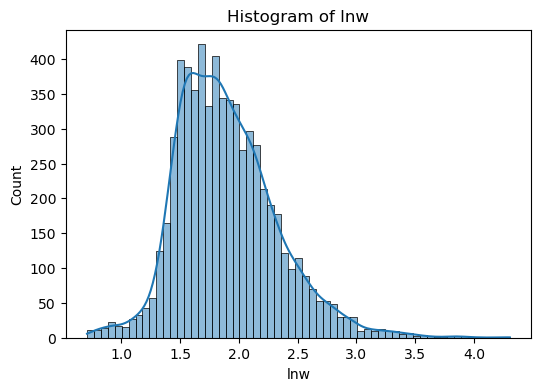


--- exper ---
Mean: 3.9572210246797876
Median: 3.451
Mode: 1.0
Standard Deviation: 2.797017754790623


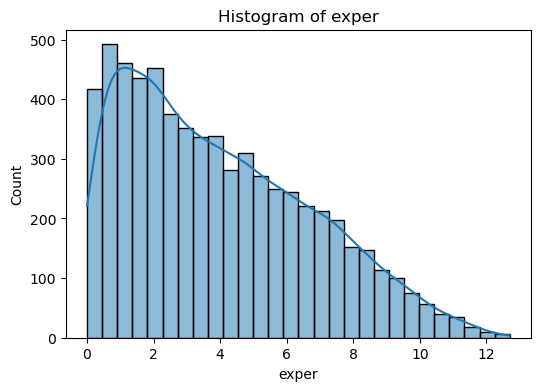


--- postexp ---
Mean: 0.9076433926897844
Median: 0.0
Mode: 0.0
Standard Deviation: 2.0006274370776147


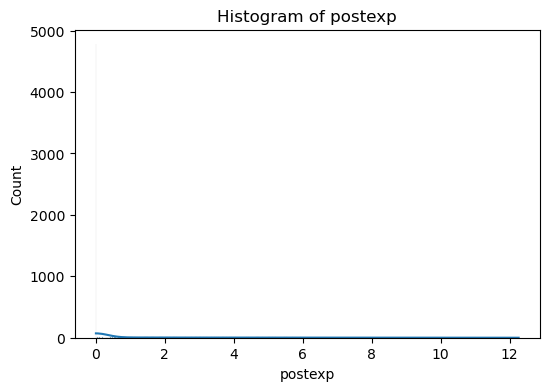


--- hgc ---
Mean: 8.947516401124648
Median: 9.0
Mode: 8
Standard Deviation: 1.3471353134304296


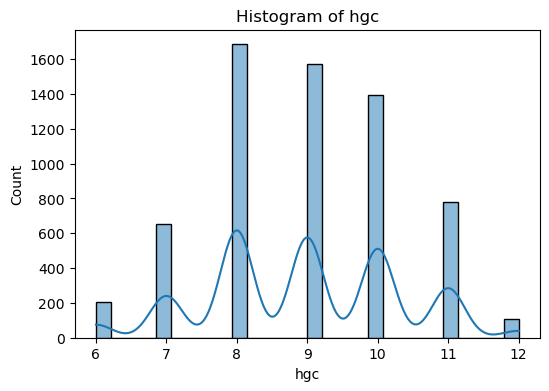


--- uerate ---
Mean: 7.732980318650422
Median: 7.0
Mode: 6.2
Standard Deviation: 3.277642073531036


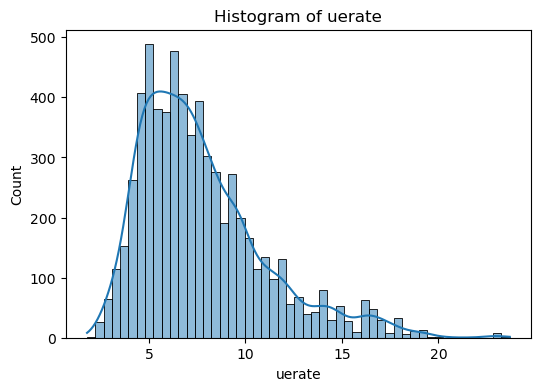


--- ue.7 ---
Mean: 0.729735
Median: 0.3
Mode: 0.729735
Standard Deviation: 3.173429767572098


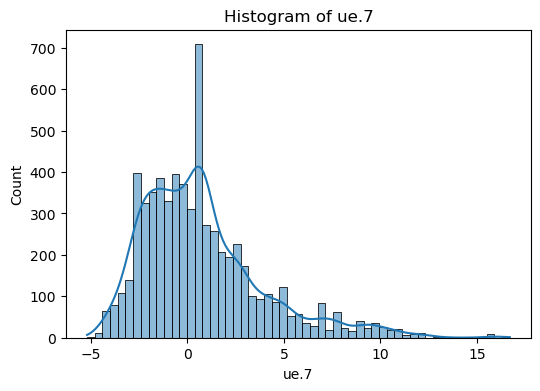


--- ue.centert1 ---
Mean: -1.0150807204803203
Median: -0.9
Mode: 0.0
Standard Deviation: 3.2097654036886034


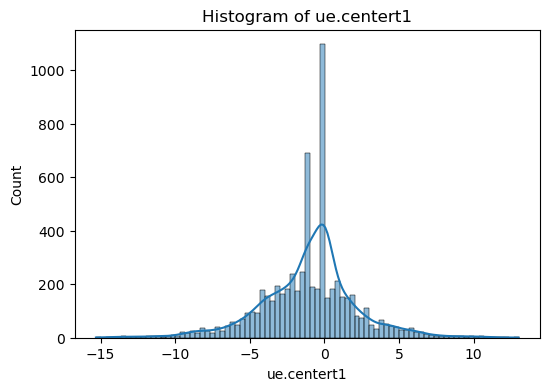


--- ue.mean ---
Mean: 7.733726960324899
Median: 7.15
Mode: 6.87
Standard Deviation: 2.460690924151892


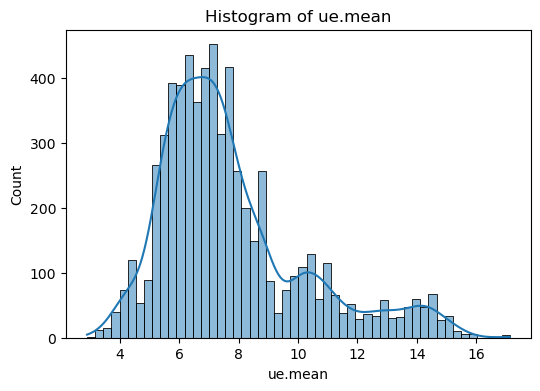


--- ue.person.cen ---
Mean: -1.1246485473279617e-05
Median: -0.142
Mode: 0.0
Standard Deviation: 2.1645339807275996


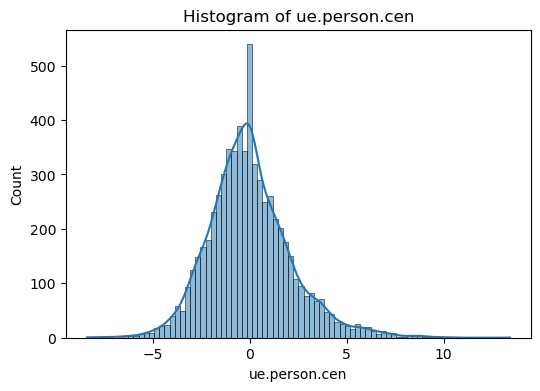


--- ue1 ---
Mean: 8.762088409871915
Median: 8.3
Mode: 5.7
Standard Deviation: 3.4705403606545415


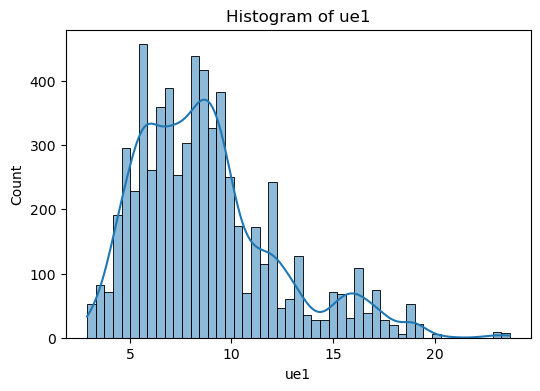

In [ ]:
# Univariate Analysis
for col in numeric_cols:
    print(f"\n--- {col} ---")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Standard Deviation:", df[col].std())
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

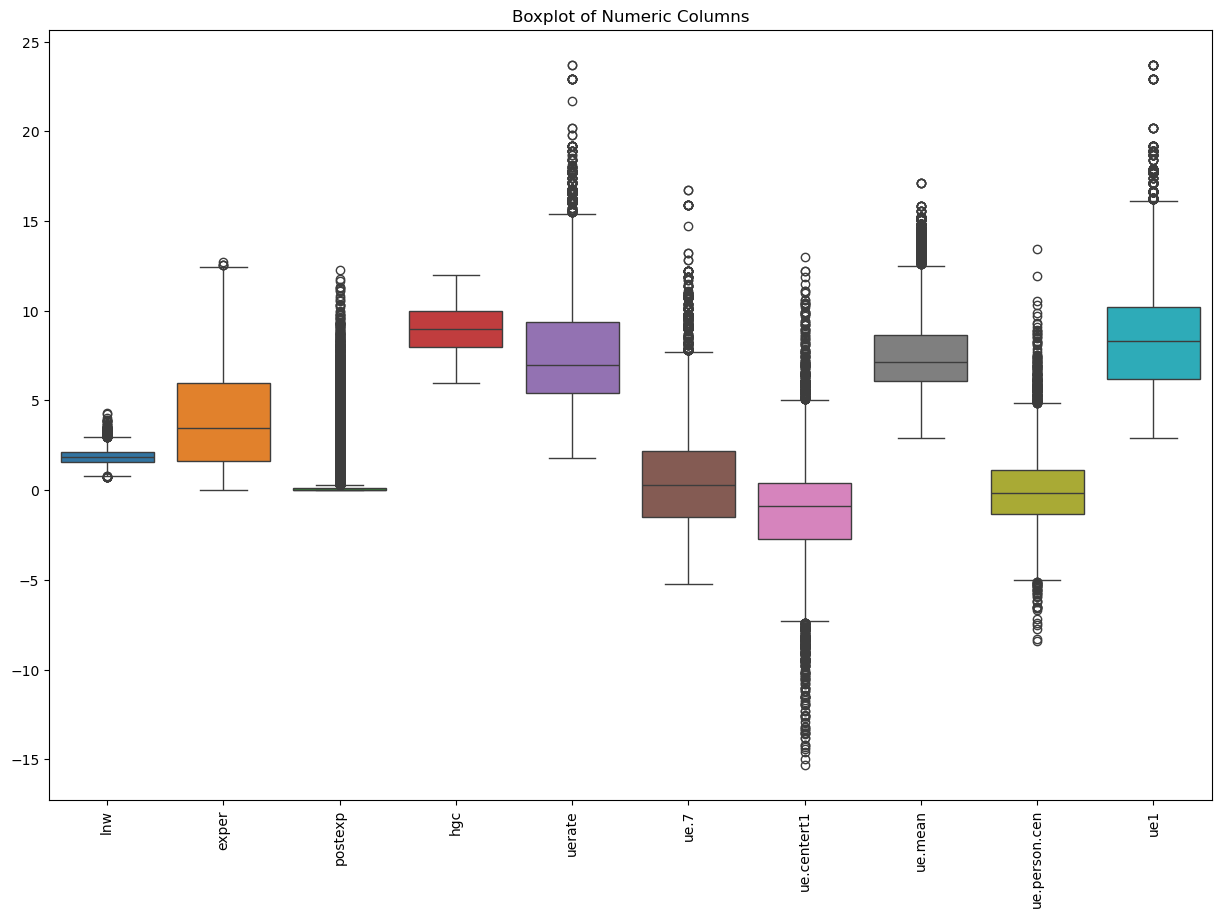

In [ ]:
# Box plot for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns")
plt.show()

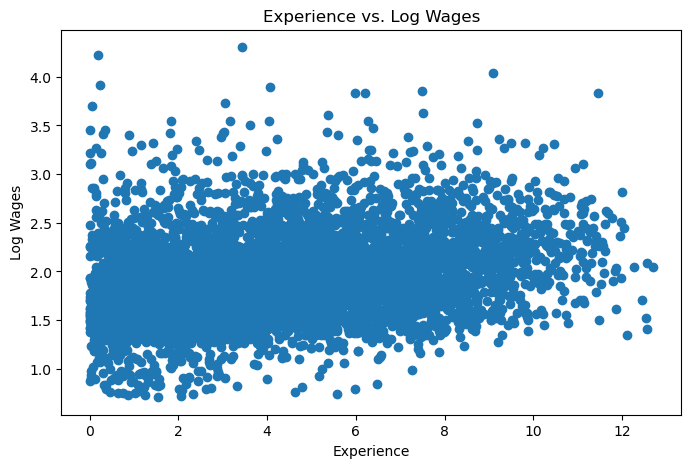

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(8, 5))
plt.scatter(df['exper'], df['lnw'])
plt.xlabel('Experience')
plt.ylabel('Log Wages')
plt.title('Experience vs. Log Wages')
plt.show()

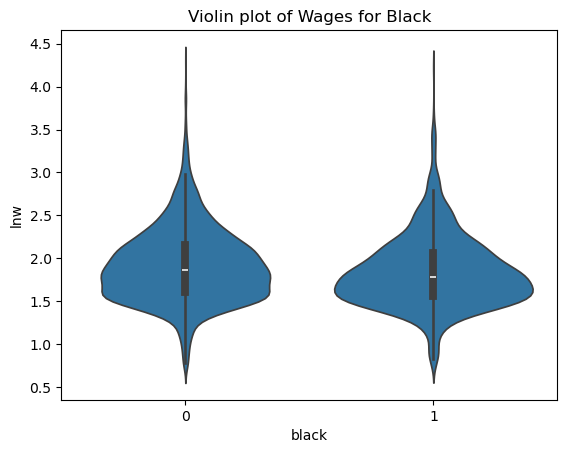

In [ ]:
# Line and Violin Plots for categorical data
sns.violinplot(x='black', y='lnw', data=df)
plt.title('Violin plot of Wages for Black')
plt.show()


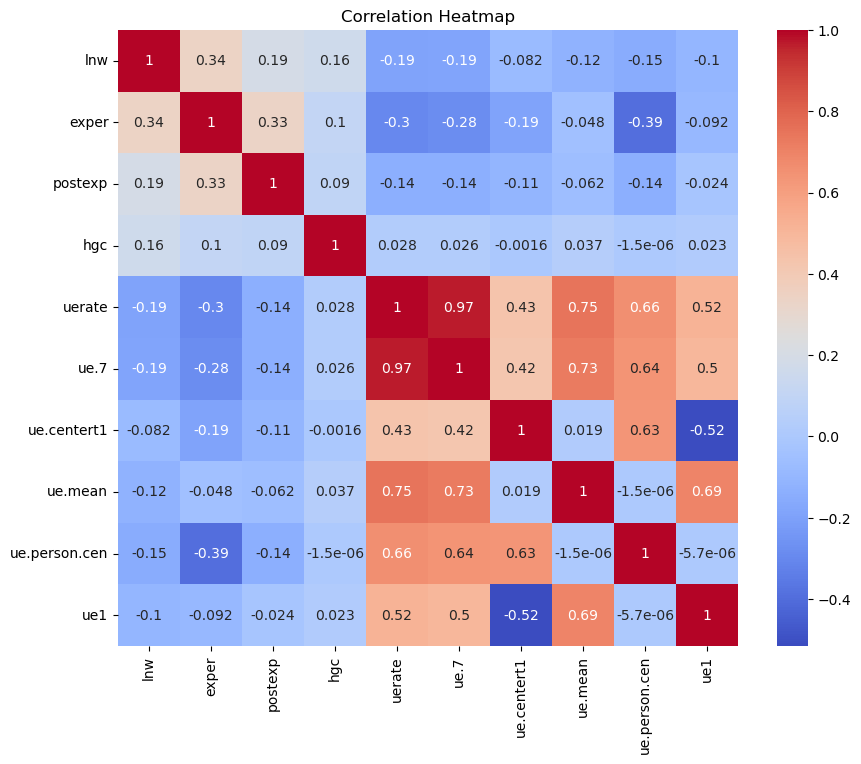

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

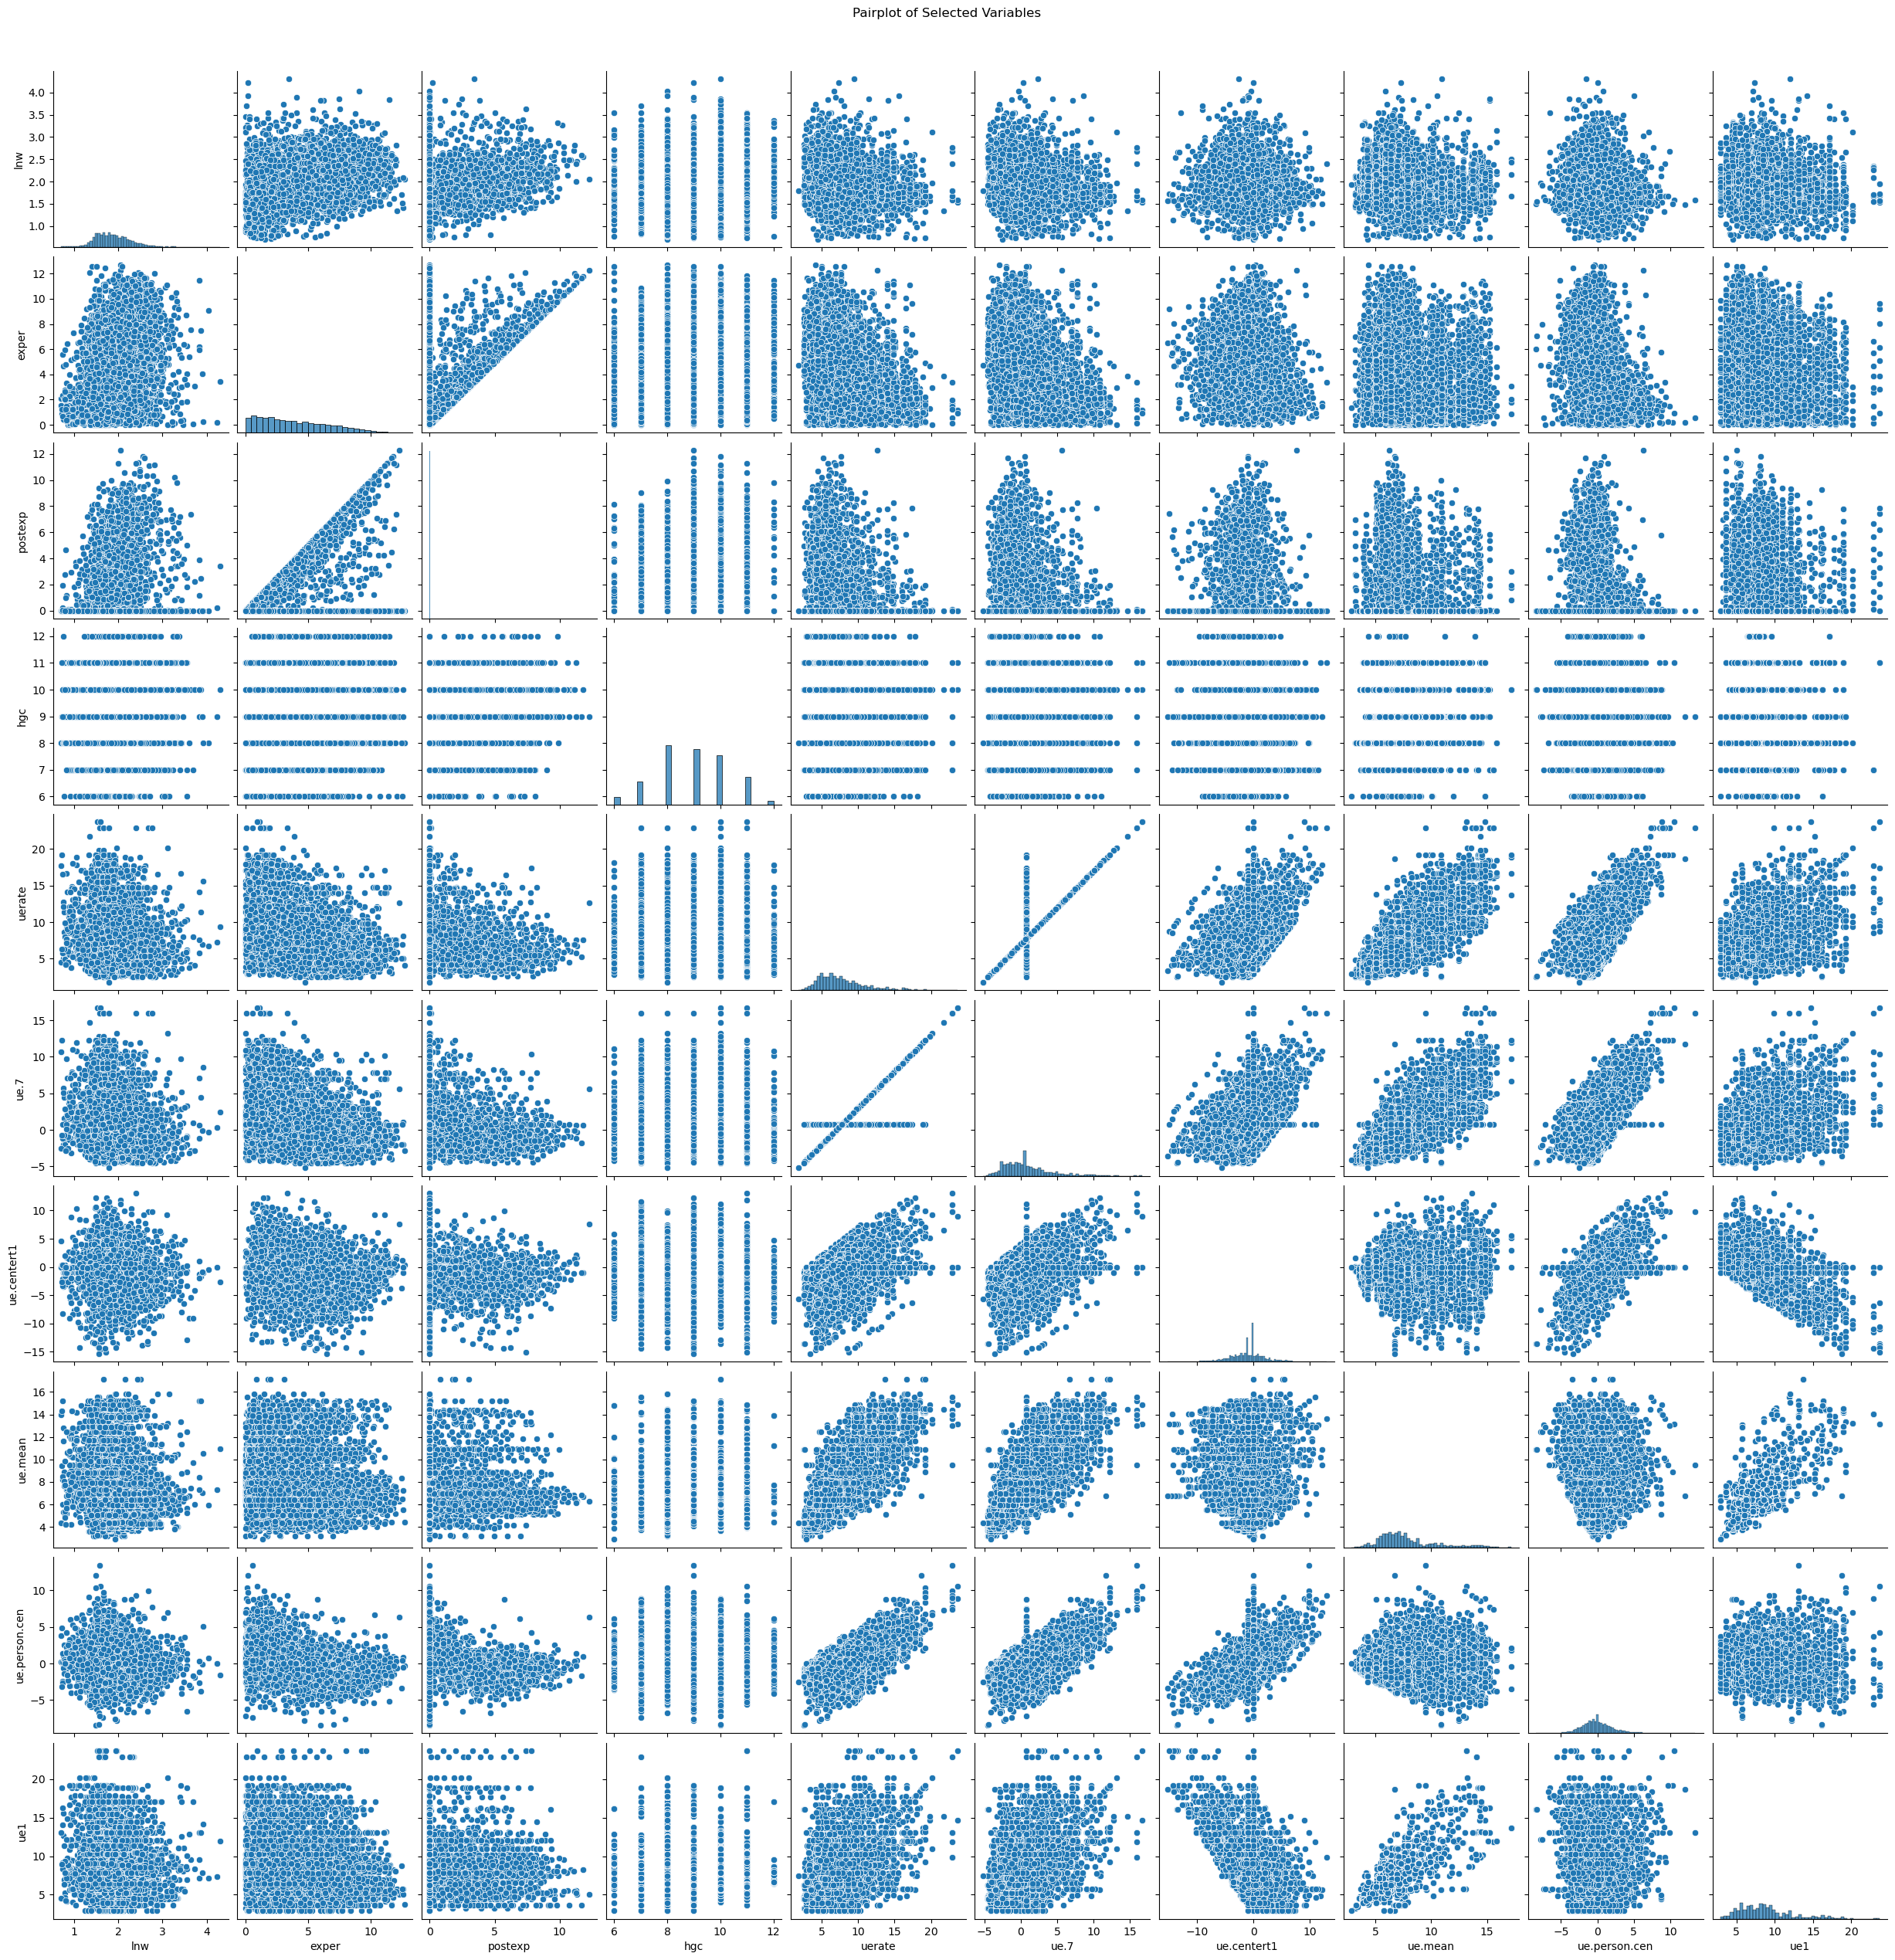

In [ ]:
# Pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

In [ ]:
# Clustering using KMeans
features = ['exper', 'postexp', 'hgc', 'uerate', 'ue.mean']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

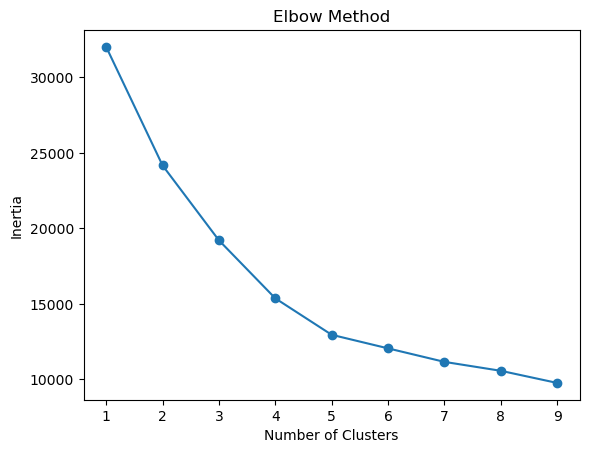

In [ ]:
# Determine optimal clusters using Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Apply optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['kmeans_cluster'] = kmeans_labels

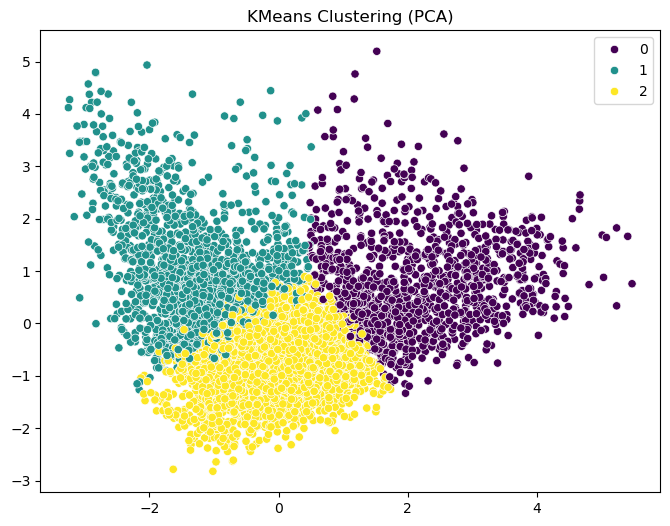

In [ ]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering (PCA)')
plt.show()


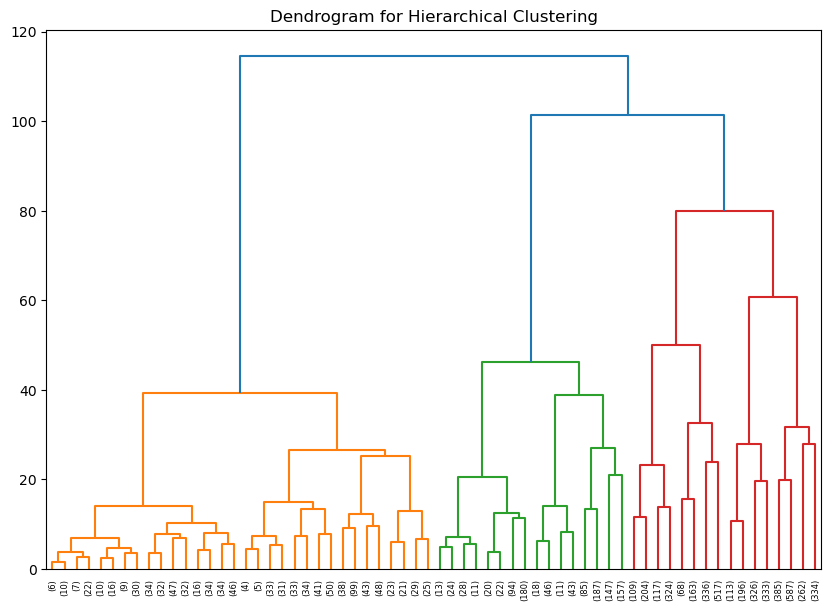

In [ ]:
# Hierarchical Clustering with Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [ ]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)
df['agg_cluster'] = agg_labels

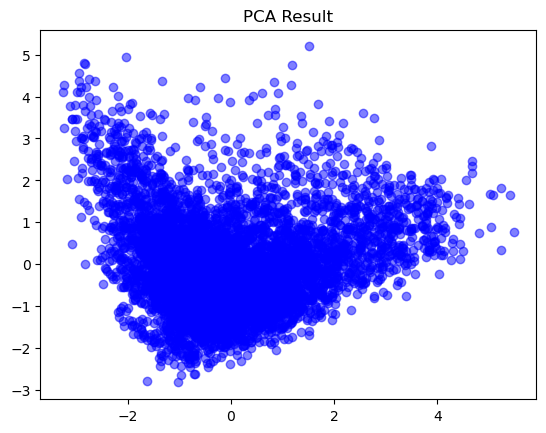

In [ ]:
# Dimensionality Reduction: PCA, t-SNE, SVD, and Factor Analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA Result')
plt.show()

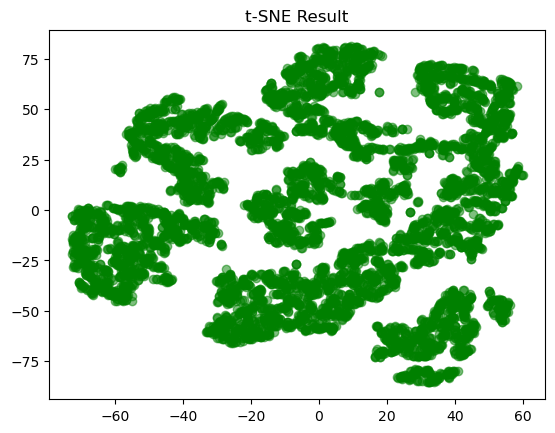

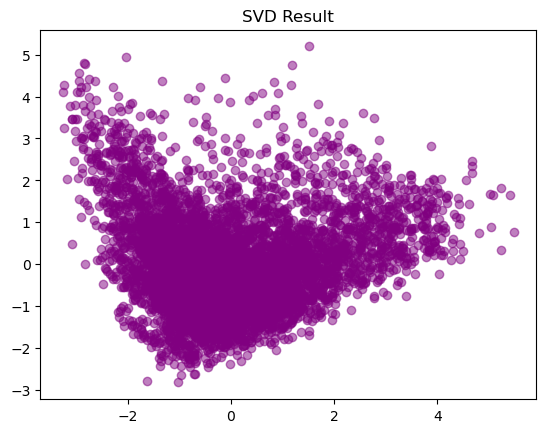

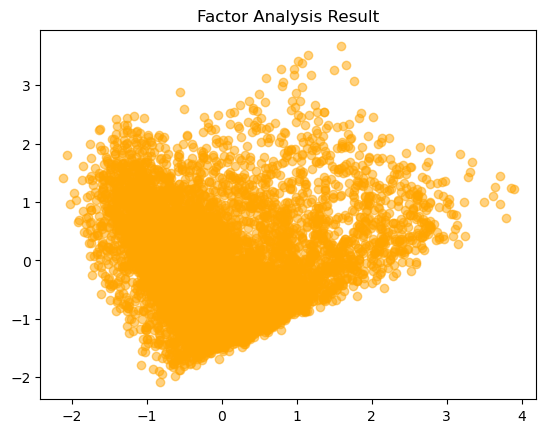

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='green', alpha=0.5)
plt.title('t-SNE Result')
plt.show()

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c='purple', alpha=0.5)
plt.title('SVD Result')
plt.show()

factor = FactorAnalysis(n_components=2)
X_factor = factor.fit_transform(X_scaled)
plt.scatter(X_factor[:, 0], X_factor[:, 1], c='orange', alpha=0.5)
plt.title('Factor Analysis Result')
plt.show()


In [ ]:
# Train-Test Split for Linear Regression
X = df[features]
y = df['lnw']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Model Evaluation
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.14305661615738618
Mean Absolute Error: 0.28669185316613294
R-Squared: 0.15872717394855507


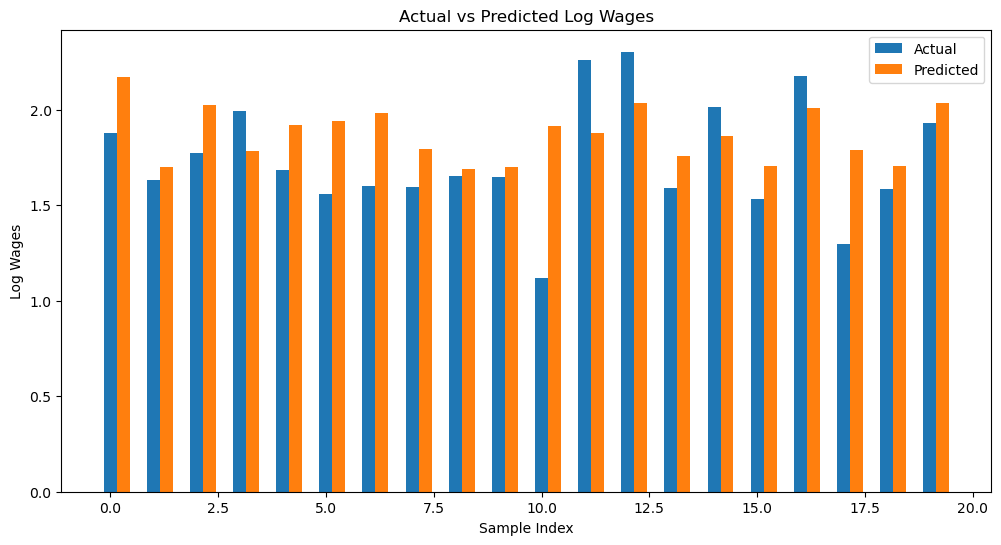

In [ ]:
# Actual vs Predicted Bar Plot
indices = np.arange(20)
plt.figure(figsize=(12, 6))
plt.bar(indices, y_test[:20], width=0.3, label='Actual')
plt.bar(indices + 0.3, y_pred[:20], width=0.3, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Log Wages')
plt.title('Actual vs Predicted Log Wages')
plt.legend()
plt.show()